# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
# importing data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# checking the shape of the dataset
df.shape

(1000, 40)

dataset has 1000 rows and 40 columns

In [5]:
# checking columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Data Cleaning

In [6]:
#checking for all the null values in the columns
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Null values are present in this dataset for authorities_contacted and _c39 columns.

In [7]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

There are values denoted as '?' which are might be NaN values. Hence, we need to get rid of those.

In [8]:
# before dropping these '?' values we are converting those into NaN values
df = df.replace('?',np.NaN)

In [9]:
df.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
# checking null values once again
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

there are missing values in collision_type,authorities_contacted, property_damage, police_report_available, _c39 columns.

In [11]:
df['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
Name: count, dtype: int64

In [12]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [13]:
df['property_damage'].value_counts()

property_damage
NO     338
YES    302
Name: count, dtype: int64

In [14]:
df['police_report_available'].value_counts()

police_report_available
NO     343
YES    314
Name: count, dtype: int64

In [15]:
# We have repalce the collision type with the mode value
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
# We have repalce the authorities_contacted with the mode value
df['authorities_contacted']=df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])
# We have replace the property damage info as no for nan values                                                  
df['property_damage']=df['property_damage'].replace(np.nan,'NO')
# We also repalce NO with nan values where police report had ? in our dataset.                                                 
df['police_report_available']=df['police_report_available'].replace(np.nan,'NO')
# we repalced _c39 because it all contain null values
df=df.drop(['_c39'],axis=1)

In [16]:
df.isnull().sum().sum()

0

In [17]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Different columns contain different number of categories or numerics. Column _c39 is not containing any data

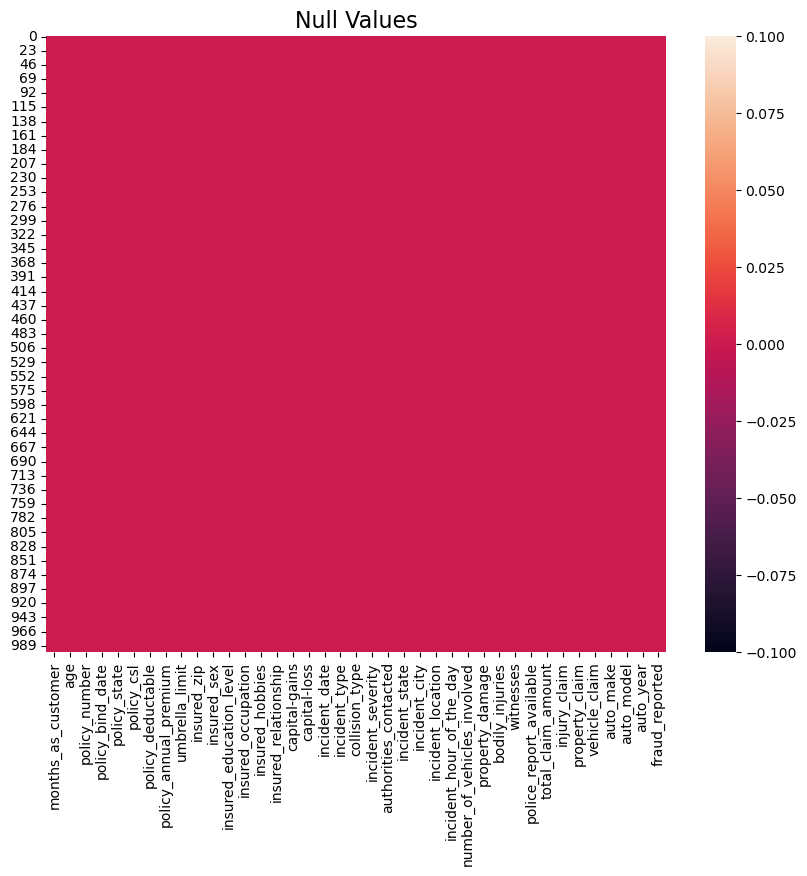

In [18]:
# ploting the heatmap to check null values
plt.figure(figsize=(10,8))
plt.title('Null Values',fontsize=16)
sns.heatmap(df.isnull());

This above heatmap displays that no null values are present in this dataset.

In [19]:
df.shape

(1000, 39)

In [20]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Expolatory Data Analysis (EDA)

In [21]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


There is no missing value present in numerical data.

Minimum age is 19 and maximum age is 64.

Policy number is the unique id that we will drop as it is not required.

policy_deductable is a discrete data.

Minimum annual premium is 433.33 and maximum annual premium is 2047.59

Minimum Umbrella limit is showing negative numbers, we need to analyze that once again.

number_of_vehicles_involved, bodily_injuries, witnesses features are containing discrete data.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [23]:
# Checking unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Data Visulization

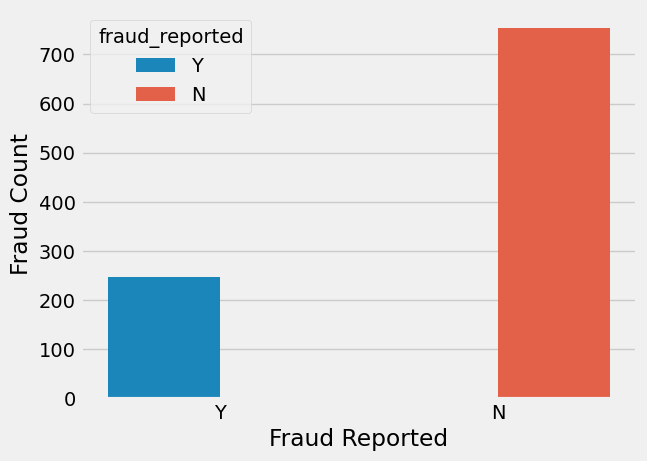

In [24]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')
ax.set_xlabel('Fraud Reported')
ax.set_ylabel('Fraud Count')
plt.show()

The countplot shows that there are around three times more records in fraud_report-no class than in fraud_report-yes class, means the dataset is imbalanced.

In [25]:
df['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

fraud_reported
N    753
Y    247
Name: count, dtype: int64

Here we see that almost 25% fraud reported.

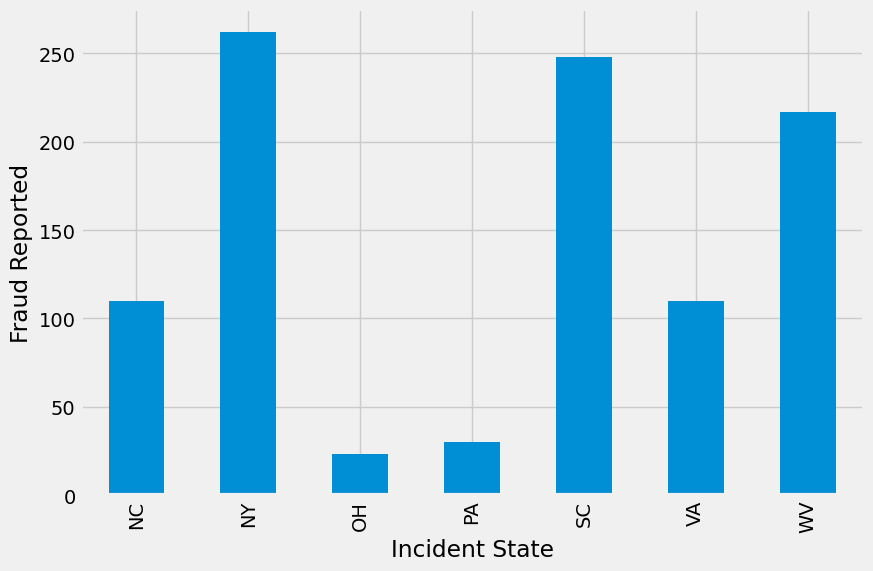

In [26]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(9,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident State')
plt.show()

Above graph shows that the states namely "NY","SC" and "WV" has the highest of number fraud report among all other states.

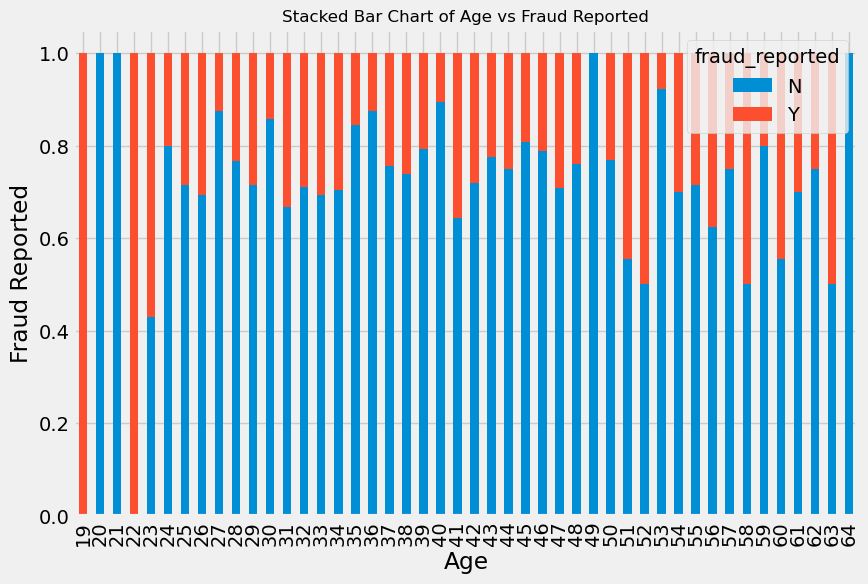

In [27]:
plt.rcParams['figure.figsize'] = [9,6]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud Reported')
plt.show()

From above plot, it is obvious that, age is an important predictor for fraud reported. Age between 19-23 shows substantial number of fraud report.

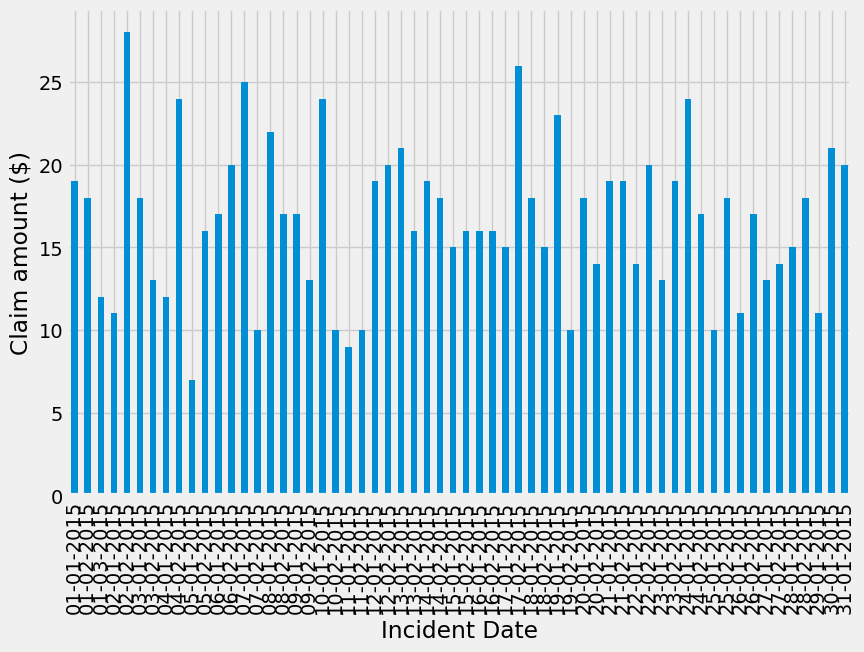

In [28]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(9,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
ax.set_xlabel('Incident Date')
plt.show()

we can see that, all the cases in above plot are for the months of January and February 2015

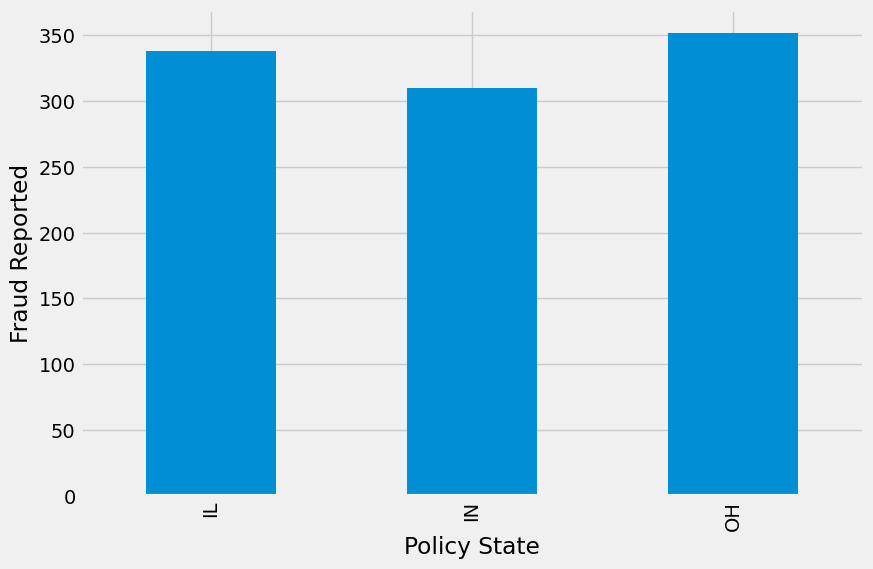

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(9,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Policy State')
plt.show()

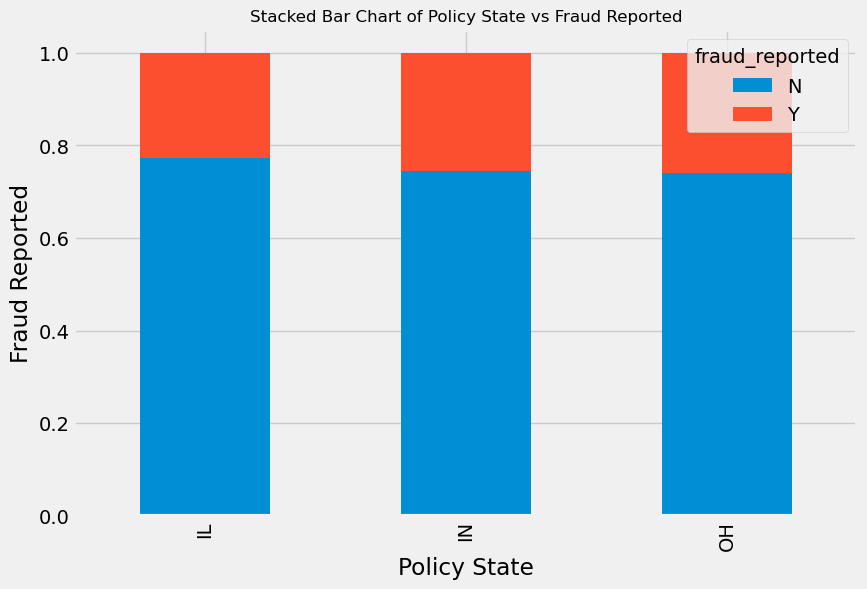

In [30]:
plt.rcParams['figure.figsize'] = [9,6]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.policy_state, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy State')
plt.ylabel('Fraud Reported')
plt.show()

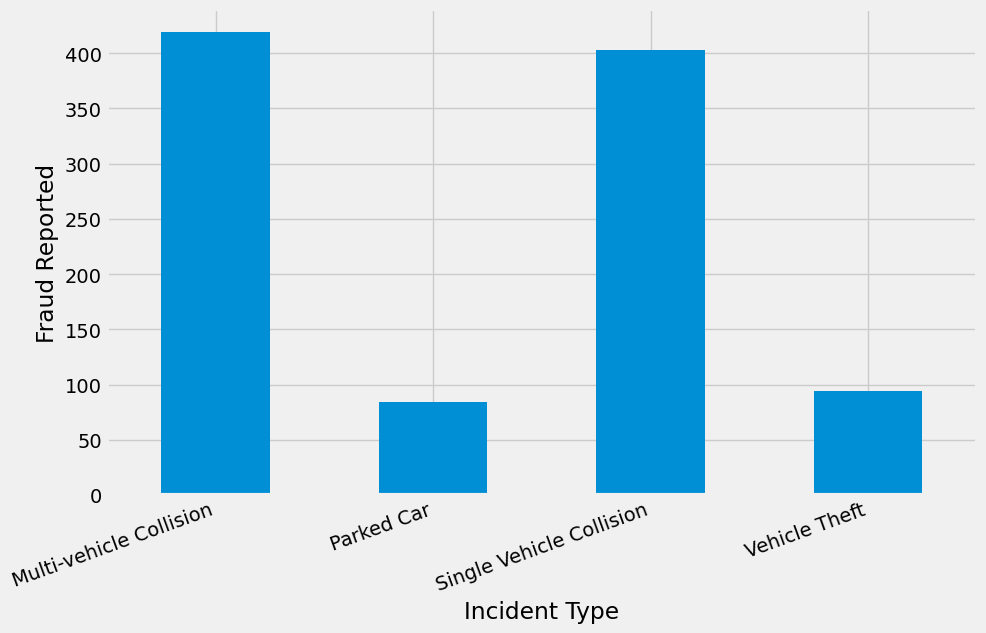

In [31]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident Type')
plt.show()

Above chart shows that Multi and Single Vehicle Collisions has the highest number of fraud reported.

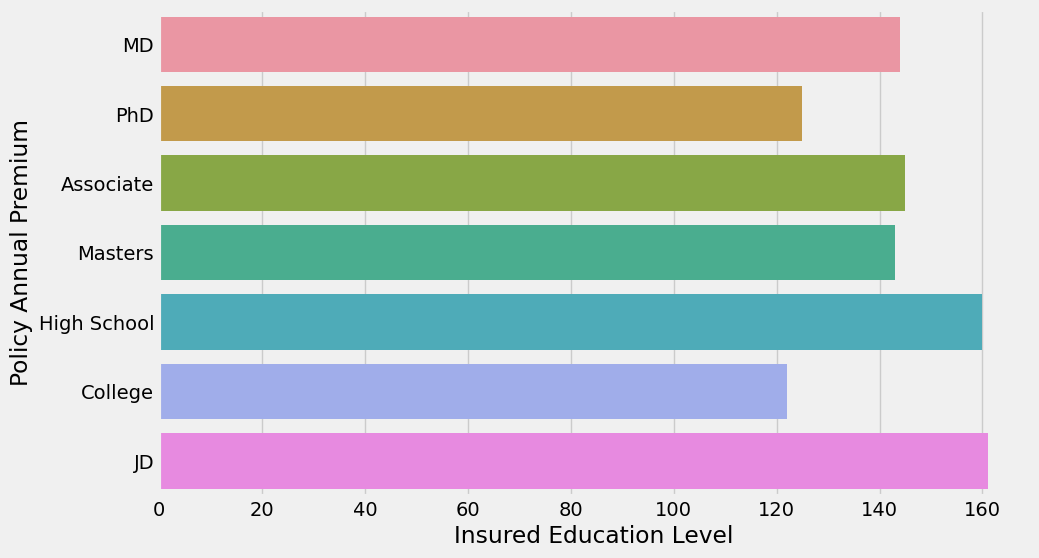

In [32]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('Policy Annual Premium')
ax.set_xlabel('Insured Education Level')
plt.show()

Above chart shows that people with JD and High School Education level have got highest policy annual premium.

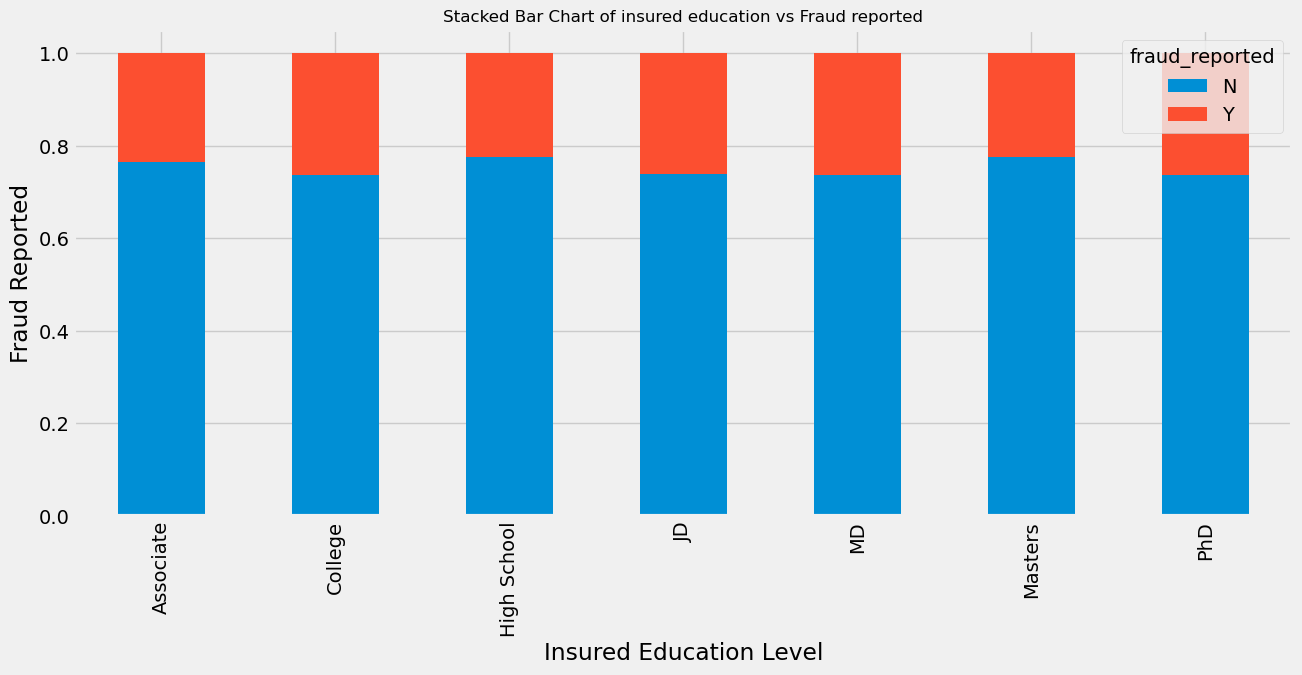

In [33]:
plt.rcParams['figure.figsize'] = [14, 6]
table=pd.crosstab(df.insured_education_level, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured education vs Fraud reported', fontsize=12)
plt.xlabel('Insured Education Level')
plt.ylabel('Fraud Reported')
plt.show()

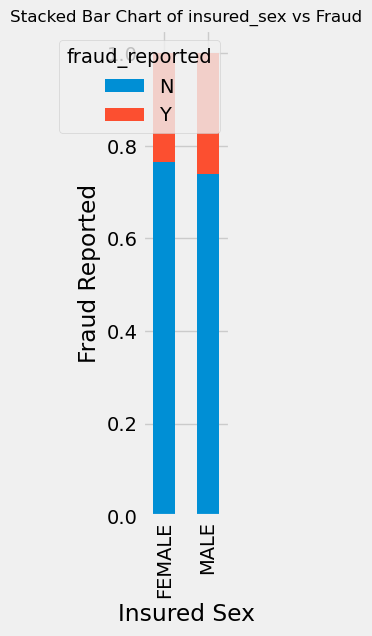

In [34]:
plt.rcParams['figure.figsize'] = [1, 6]
table=pd.crosstab(df.insured_sex, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_sex vs Fraud', fontsize=12)
plt.xlabel('Insured Sex')
plt.ylabel('Fraud Reported')
plt.show()

Above chart shows that the fraud report rate is high in case of Male as compared to Female.

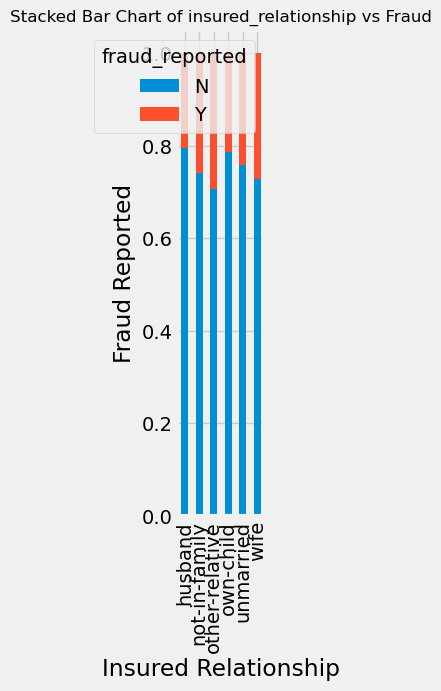

In [35]:
table=pd.crosstab(df.insured_relationship, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('Insured Relationship')
plt.ylabel('Fraud Reported')
plt.show()

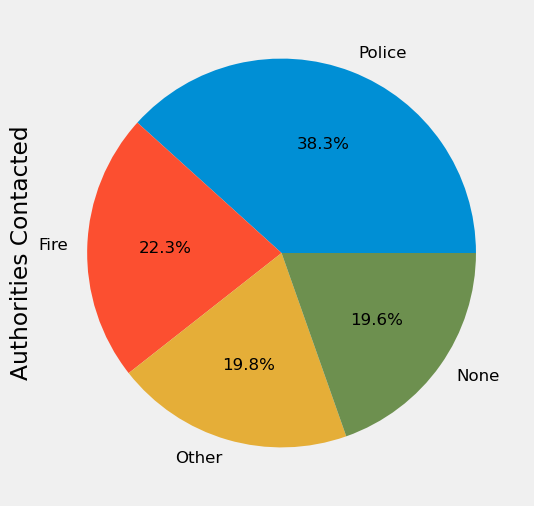

In [36]:
fig = plt.figure(figsize=(6,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)
plt.ylabel('Authorities Contacted')
plt.show()

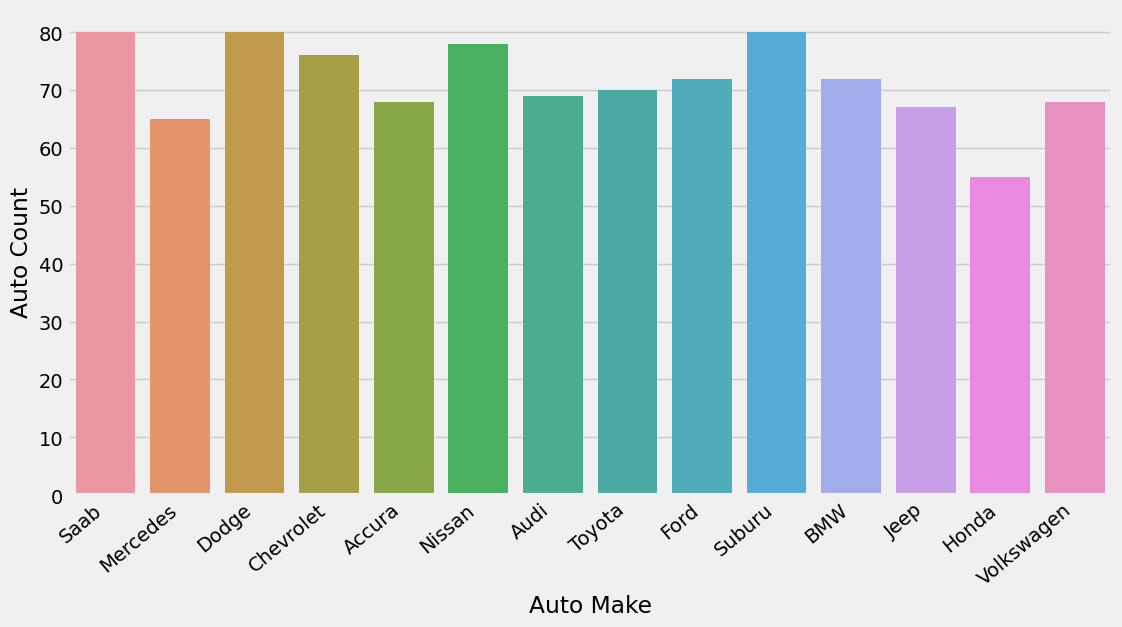

In [37]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Auto Make')
plt.ylabel('Auto Count')
plt.show()

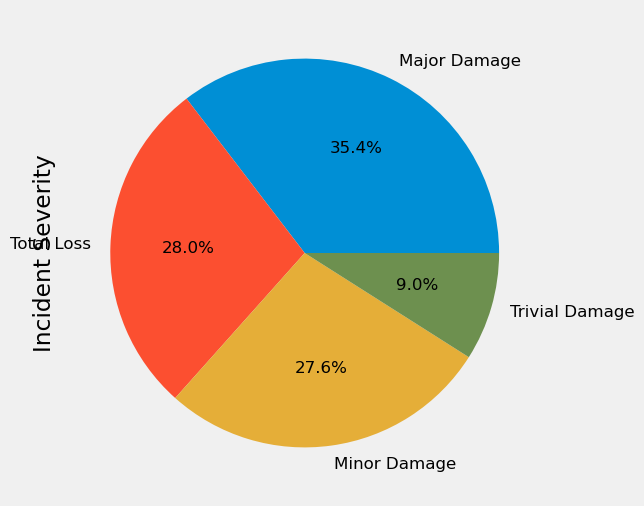

In [38]:
fig = plt.figure(figsize=(6,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)
plt.ylabel('Incident Severity')
plt.show()

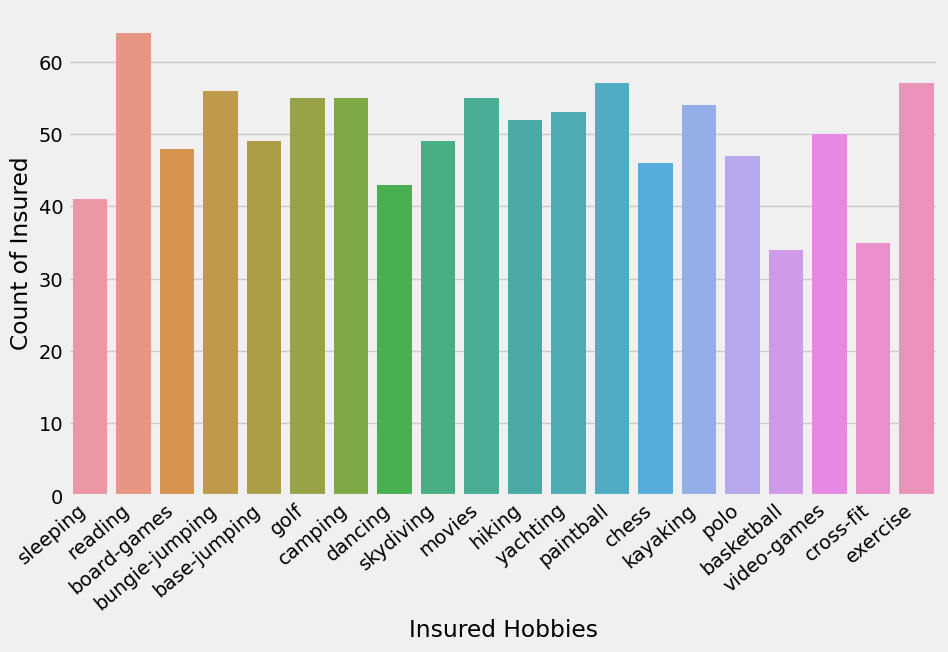

In [39]:
ig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Insured Hobbies')
plt.ylabel('Count of Insured')
plt.show()

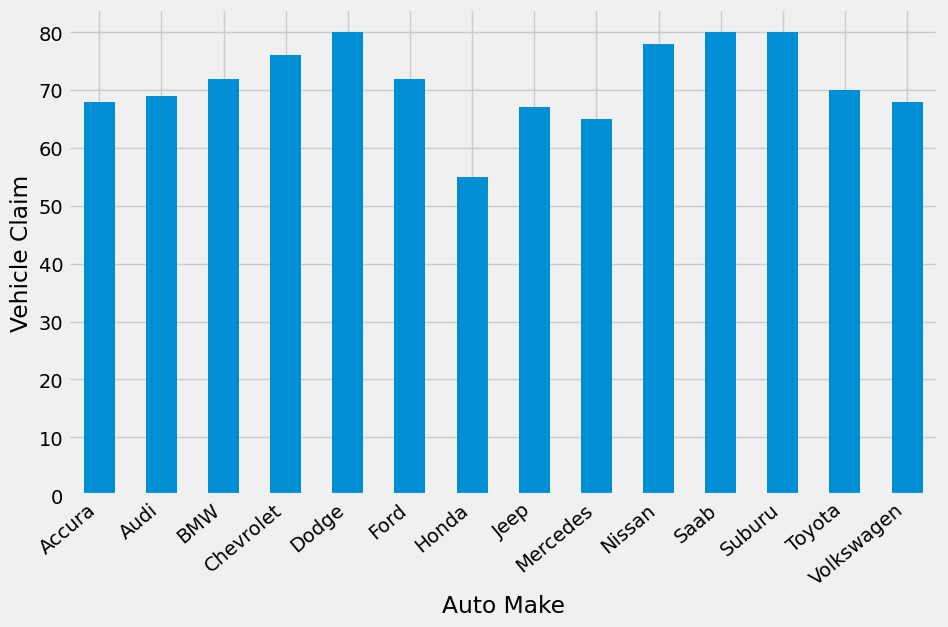

In [40]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle Claim')
ax.set_xlabel('Auto Make')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Above chart shows that Auto Maker name "Dodge","Saab" and "Suburu" accounts for highest Vehicle Claim as compared others.

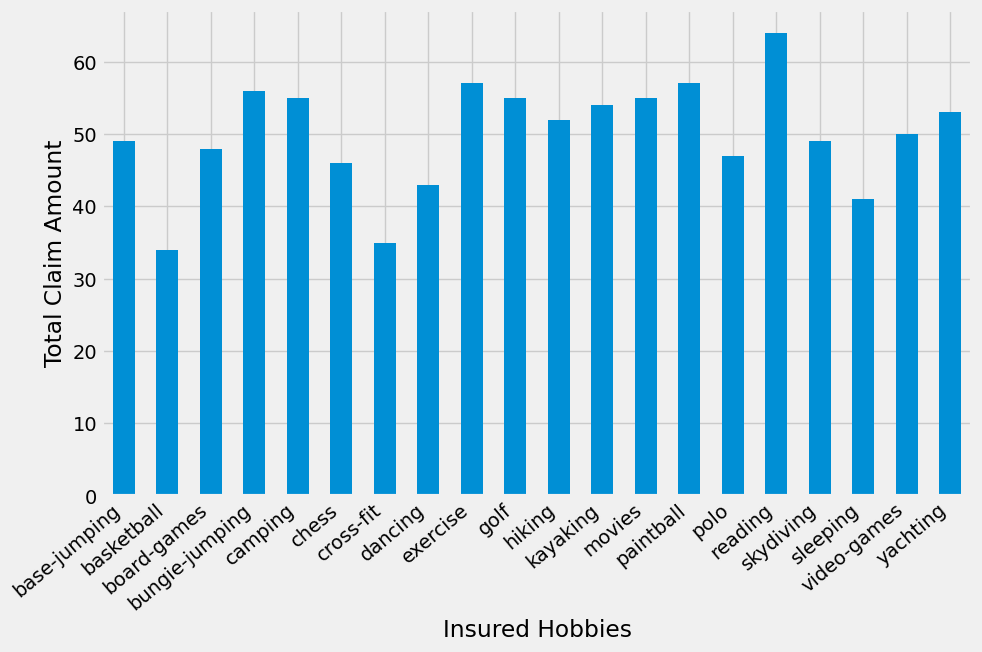

In [41]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total Claim Amount')
ax.set_xlabel('Insured Hobbies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [42]:
df.auto_year.value_counts()  # check the spread of years to decide on further action.

auto_year
1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: count, dtype: int64

auto_year has 21 levels, and the number of records for each of the levels are quite significant considering datasize is not so large. We will do some feature engineering using this variable considering, the year of manufacturing of automobile indicates the age of the vehicle and may contain valuable information for insurance premium or fraud is concerned.

In [43]:
df['vehicle_age'] = 2018 -df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [44]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,vehicle_age
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,14
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,11
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,11
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,4
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NO,87200,17440,8720,61040,Honda,Accord,2006,N,12
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,3
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,22
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,20


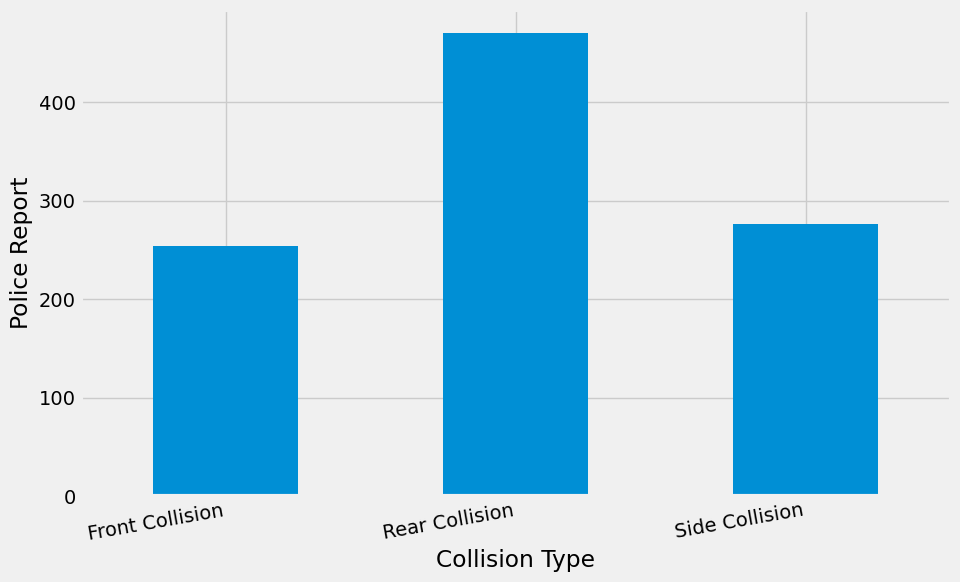

In [45]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police Report')
ax.set_xlabel('Collision Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

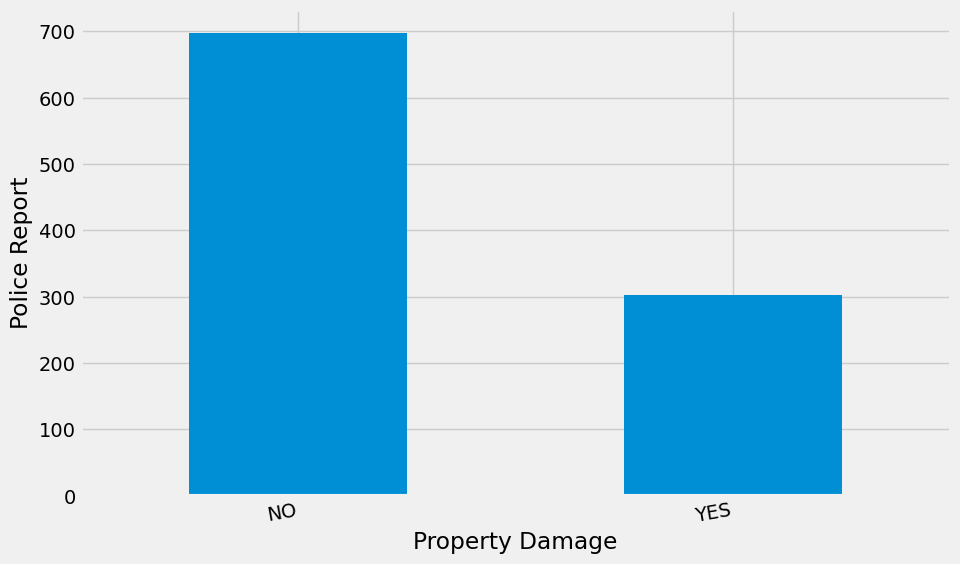

In [46]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police Report')
ax.set_xlabel('Property Damage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [47]:
# Check on categorical variables:

df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [48]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()

val=['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_date', 'incident_type', 'collision_type','incident_severity','authorities_contacted','incident_state', 'incident_city',
       'incident_location', 'property_damage','police_report_available','auto_make','auto_model','fraud_reported']
for i in val:
    df[i]=le.fit_transform(df[i])

In [50]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,vehicle_age
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,71610,6510,13020,52080,10,1,2004,1,14
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,2007,1,11
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,0,34650,7700,3850,23100,4,30,2007,0,11
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,0,63400,6340,6340,50720,3,34,2014,1,4
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,6500,1300,650,4550,0,31,2009,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,0,87200,17440,8720,61040,6,6,2006,0,12
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,0,108480,18080,18080,72320,13,28,2015,0,3
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,1,67500,7500,7500,52500,11,19,1996,0,22
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,46980,5220,5220,36540,1,5,1998,0,20


In [51]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

In [52]:
df['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
df['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
df['police_report_available'].replace(to_replace='?', value=0, inplace=True)

In [53]:
df['property_damage'].replace(to_replace='YES', value=1, inplace=True)
df['property_damage'].replace(to_replace='NO', value=0, inplace=True)
df['property_damage'].replace(to_replace='?', value=0, inplace=True)

# Correlation

In [54]:
# Checking the Correlation with respect to target variable(fraud_reported):-

df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
authorities_contacted         -0.099688
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
incident_city                 -0.040403
policy_csl                    -0.037190
policy_number                 -0.029443
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
collision_type                -0.017315
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_location             -0.008832
vehicle_age                   -0.007928
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
property_damage                0.017202


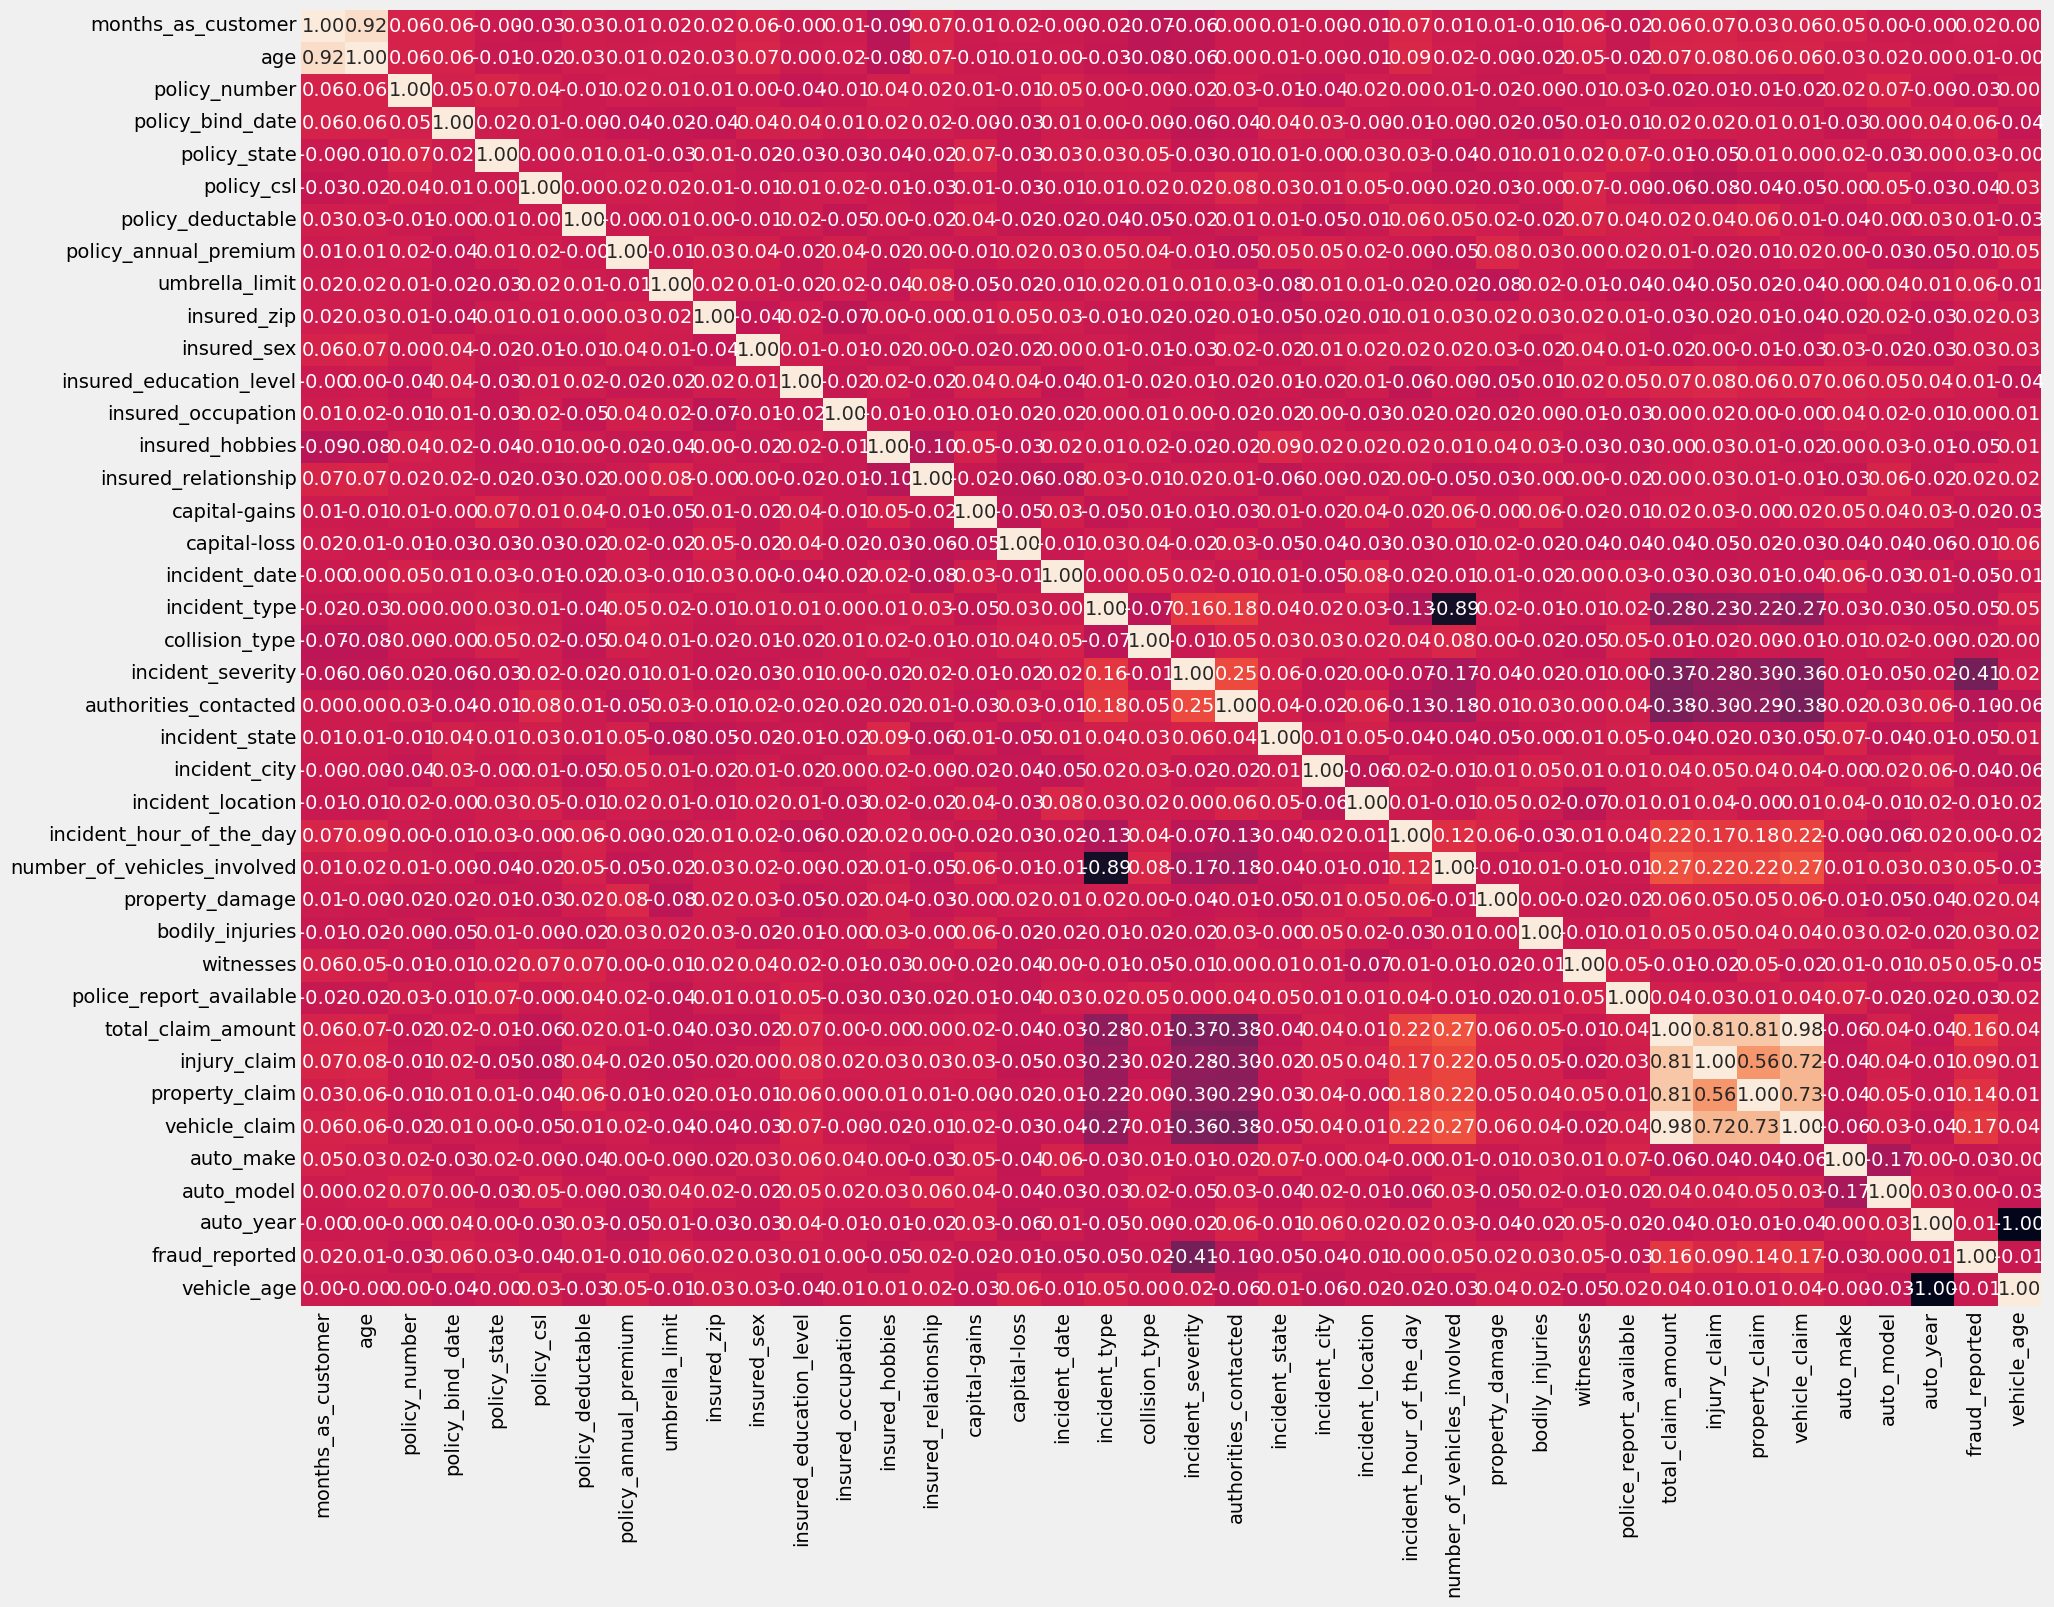

In [55]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cbar=False)
plt.show()

Above heatmap shows that 'incident_location','vehicle_age','auto_model','insured_occupation','incident_hour_of_the_day', 'auto_year' and 'insured_education_level' are less correlated with the target variable.

Feature Selection

In [56]:
# Drop the less correlated/non-relevant columns;

df=df.drop([ 'incident_location','vehicle_age','auto_model','insured_occupation','incident_hour_of_the_day', 'auto_year','insured_education_level'],axis=1)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,1,2,1,71610,6510,13020,52080,10,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,0,0,5070,780,780,3510,8,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,0,2,3,0,34650,7700,3850,23100,4,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,0,1,2,0,63400,6340,6340,50720,3,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,0,1,0,6500,1300,650,4550,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,1,0,87200,17440,8720,61040,6,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,1,2,3,0,108480,18080,18080,72320,13,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,0,2,3,1,67500,7500,7500,52500,11,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,0,0,1,1,46980,5220,5220,36540,1,0


In [57]:
df.shape

(1000, 33)

In [58]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'fraud_reported'],
      dtype='object')

# checking for the skewness:-

In [59]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777


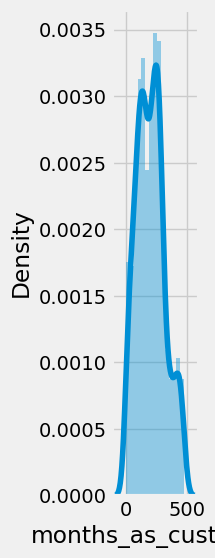

In [60]:
# checking with the distribution curve:-

sns.distplot(df['months_as_customer'])
plt.show()

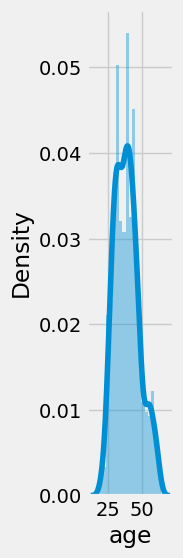

In [61]:
sns.distplot(df['age'])
plt.show()

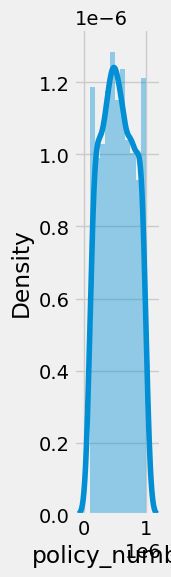

In [62]:
sns.distplot(df['policy_number'])
plt.show()

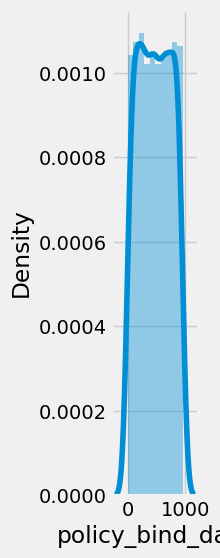

In [63]:
sns.distplot(df['policy_bind_date'])
plt.show()

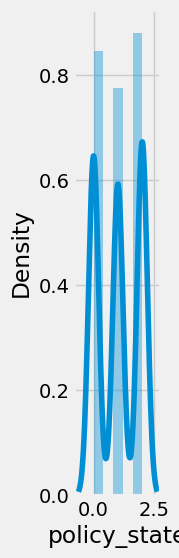

In [64]:
sns.distplot(df['policy_state'])
plt.show()

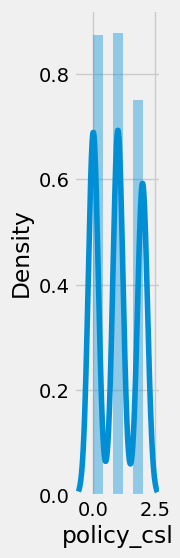

In [65]:
sns.distplot(df['policy_csl'])
plt.show()

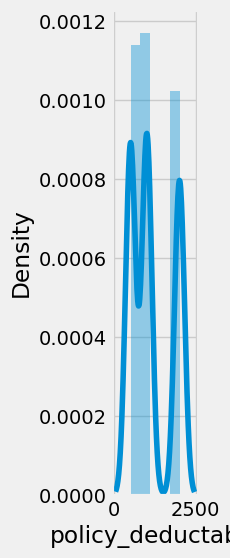

In [66]:
sns.distplot(df['policy_deductable'])
plt.show()

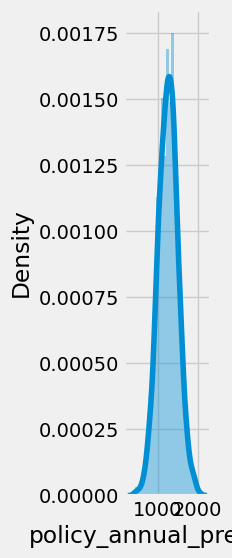

In [67]:
sns.distplot(df['policy_annual_premium'])
plt.show()

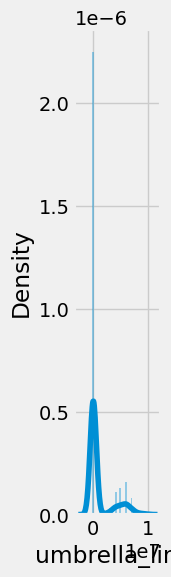

In [68]:
sns.distplot(df['umbrella_limit'])
plt.show()

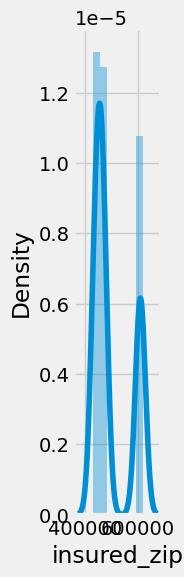

In [69]:
sns.distplot(df['insured_zip'])
plt.show()

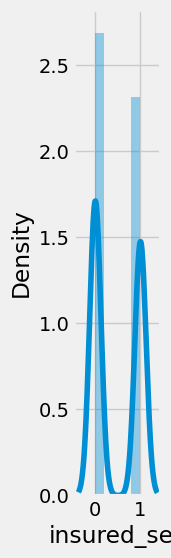

In [70]:
sns.distplot(df['insured_sex'])
plt.show()

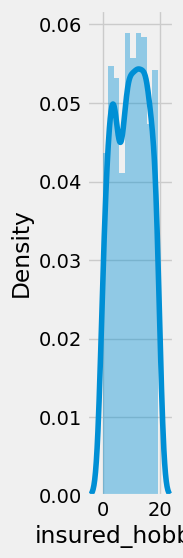

In [71]:
sns.distplot(df['insured_hobbies'])
plt.show()

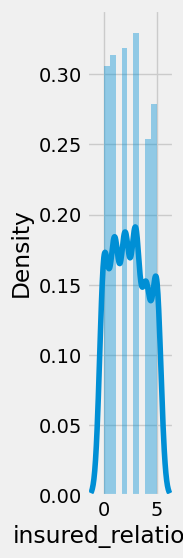

In [72]:
sns.distplot(df['insured_relationship'])
plt.show()

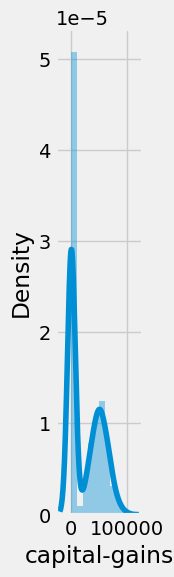

In [73]:
sns.distplot(df['capital-gains'])
plt.show()

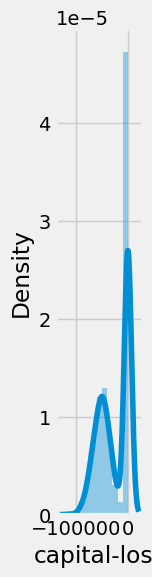

In [74]:
sns.distplot(df['capital-loss'])
plt.show()

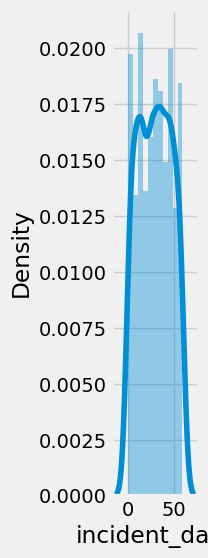

In [75]:
sns.distplot(df['incident_date'])
plt.show()

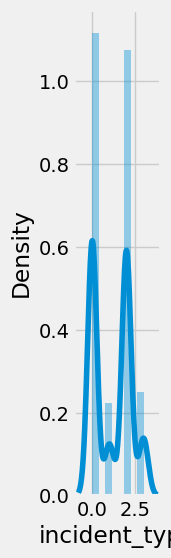

In [76]:
sns.distplot(df['incident_type'])
plt.show()

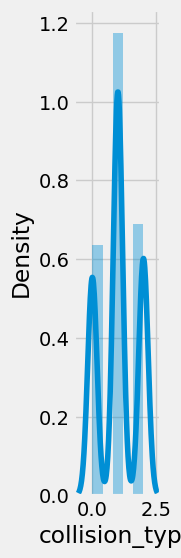

In [77]:
sns.distplot(df['collision_type'])
plt.show()

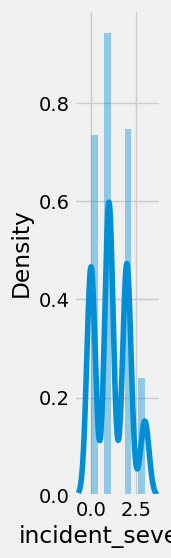

In [78]:
sns.distplot(df['incident_severity'])
plt.show()

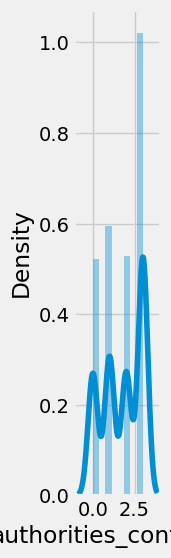

In [79]:
sns.distplot(df['authorities_contacted'])
plt.show()

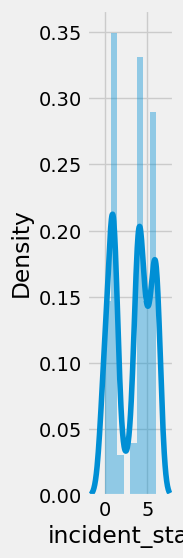

In [80]:
sns.distplot(df['incident_state'])
plt.show()

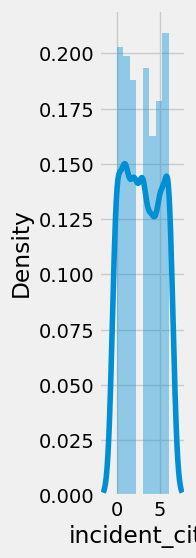

In [81]:
sns.distplot(df['incident_city'])
plt.show()

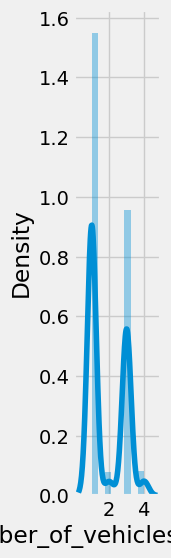

In [82]:
sns.distplot(df['number_of_vehicles_involved'])
plt.show()

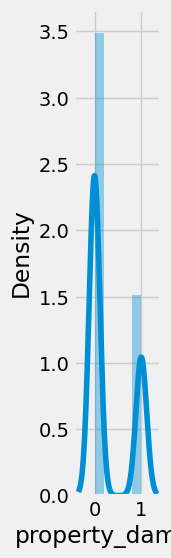

In [83]:
sns.distplot(df['property_damage'])
plt.show()

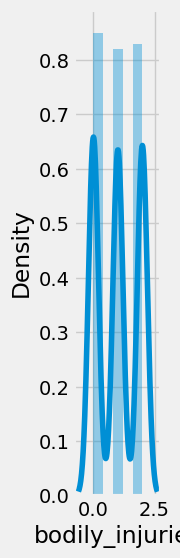

In [84]:
sns.distplot(df['bodily_injuries'])
plt.show()

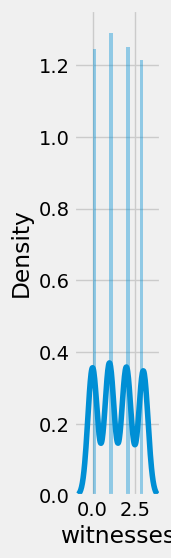

In [85]:
sns.distplot(df['witnesses'])
plt.show()

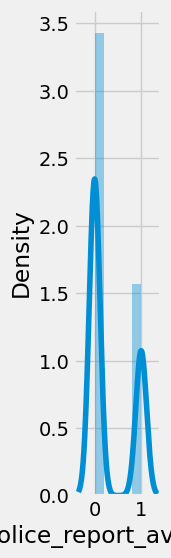

In [86]:
sns.distplot(df['police_report_available'])
plt.show()

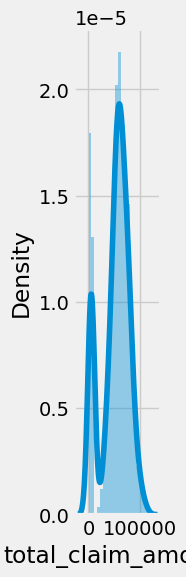

In [87]:
sns.distplot(df[ 'total_claim_amount'])
plt.show()

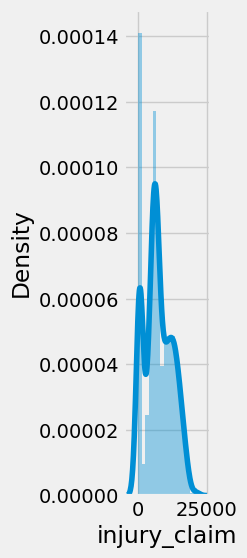

In [88]:
sns.distplot(df['injury_claim'])
plt.show()

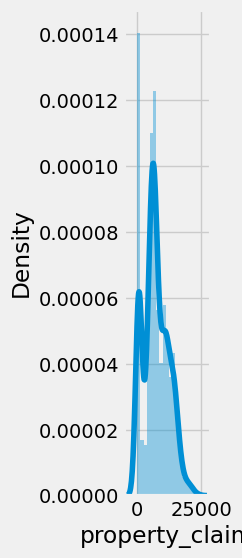

In [89]:
sns.distplot(df['property_claim'])
plt.show()

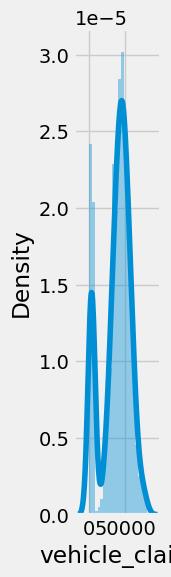

In [90]:
sns.distplot(df['vehicle_claim'])
plt.show()

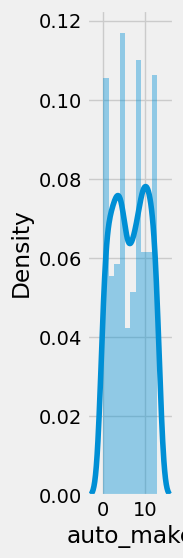

In [91]:
sns.distplot(df['auto_make'])
plt.show()

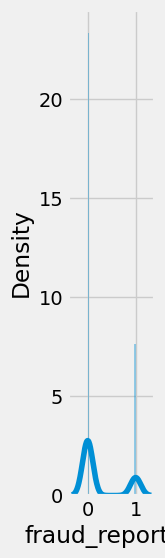

In [92]:
sns.distplot(df['fraud_reported'])
plt.show()

# Outliers Removal

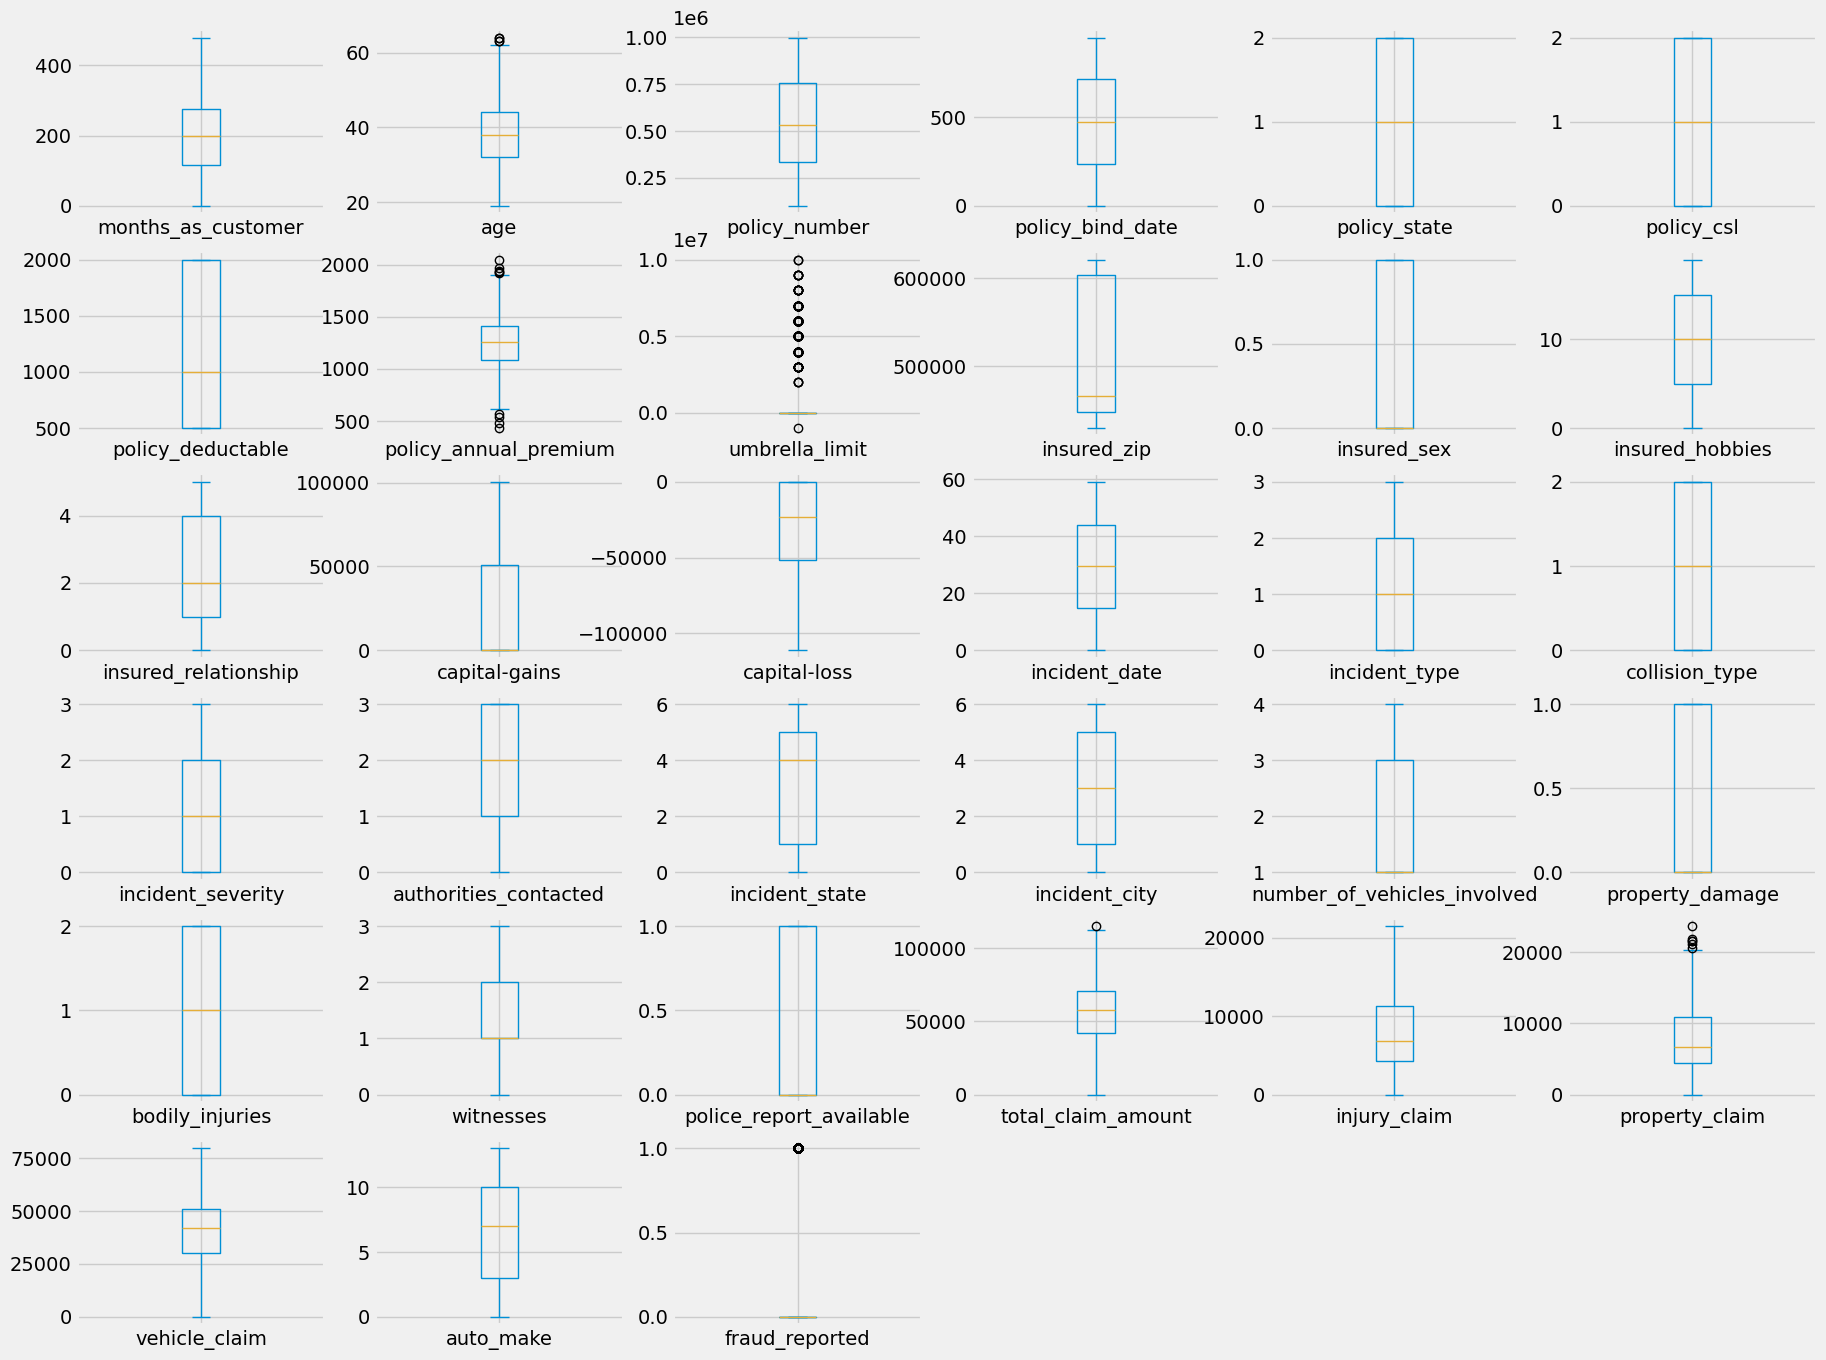

In [93]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,16),grid=True)
plt.show()

In [94]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,1.078140,0.990836,0.095953,0.209500,1.187173,0.060937,0.222383,0.616705,0.479476,0.489529,...,1.520282,0.009759,0.461838,1.478078,0.714257,0.189283,1.165505,0.749653,0.856466,1.746019
1,0.208995,0.334073,0.791527,1.259397,0.016856,0.060937,1.412784,0.242521,1.697980,0.461008,...,0.657773,1.210174,1.338700,0.676554,1.807312,1.363822,1.372696,1.823346,0.360539,1.746019
2,0.608002,1.088913,0.550566,1.047470,1.187173,1.182668,1.412784,0.642233,1.697980,0.984885,...,0.657773,1.229693,1.362107,0.676554,0.686362,0.054644,0.736072,0.785565,0.631315,0.572731
3,0.452355,0.224613,1.239334,1.059589,1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,...,0.657773,0.009759,0.461838,0.676554,0.403135,0.224130,0.219722,0.677607,0.879279,1.746019
4,0.208995,0.552994,0.695834,1.065634,1.220886,1.304542,0.222383,1.341980,2.133471,1.527808,...,0.657773,1.210174,0.438431,0.676554,1.753121,1.257232,1.399654,1.768252,1.623169,0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.539740,0.046021,1.187173,1.304542,0.222383,0.222884,0.479476,0.975717,...,1.520282,1.210174,0.438431,0.676554,1.305049,2.051155,0.273817,1.224309,0.135388,0.572731
996,0.704407,0.224613,1.398429,1.254543,1.220886,1.182668,0.222383,0.739141,0.479476,1.492519,...,1.520282,1.229693,1.362107,0.676554,2.111466,2.182342,2.214794,1.821868,1.600357,0.572731
997,0.642767,0.541611,1.448920,0.125944,1.187173,0.060937,1.039966,0.520739,0.826998,0.815138,...,0.657773,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,1.104430,0.572731
998,2.208028,2.523284,0.047867,0.358447,1.220886,1.304542,1.412784,0.411866,1.697980,0.830250,...,0.657773,1.210174,0.438431,1.478078,0.219110,0.453708,0.451976,0.073580,1.375206,0.572731


In [95]:
# index no.

np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 29,  8,  8,  8,  7, 14,
         8,  8,  8], dtype=int64))

In [96]:
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,1,2,1,71610,6510,13020,52080,10,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,0,0,5070,780,780,3510,8,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,0,2,3,0,34650,7700,3850,23100,4,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,0,1,2,0,63400,6340,6340,50720,3,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,0,1,0,6500,1300,650,4550,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,1,0,87200,17440,8720,61040,6,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,1,2,3,0,108480,18080,18080,72320,13,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,0,2,3,1,67500,7500,7500,52500,11,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,0,0,1,1,46980,5220,5220,36540,1,0


In [97]:
df.shape

(1000, 33)

In [98]:
df_new.shape

(980, 33)

In [99]:
# percentage data loss:-

loss_percent=(1000-980)/(980*100)
print(loss_percent,'%')

0.00020408163265306123 %


In [100]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(df,method='yeo-johnson')
X

array([[ 1.05127872,  1.00873272, -0.02315574, ...,  0.75369677,
         0.85911096,  1.74601919],
       [ 0.30453584,  0.43143333, -0.74529151, ..., -1.7866293 ,
         0.41861586,  1.74601919],
       [-0.51122603, -1.13951302,  0.58793118, ..., -0.82088123,
        -0.55514878, -0.57273139],
       ...,
       [-0.54970642, -0.47044379,  1.37330822, ...,  0.77723183,
         1.07113608, -0.57273139],
       [ 1.9126537 ,  2.13055434,  0.02397688, ..., -0.10425834,
        -1.44076333, -0.57273139],
       [ 1.90009963,  1.98572613,  0.10769485, ..., -1.77908726,
         0.41861586, -0.57273139]])

In [101]:
X.ndim

2

In [102]:
X.std()

0.9847319278346619

In [103]:
x=df_new.drop(['fraud_reported'],axis=1)
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,1,1,2,1,71610,6510,13020,52080,10
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,1,0,0,0,0,5070,780,780,3510,8
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,2,3,0,34650,7700,3850,23100,4
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,0,1,2,0,63400,6340,6340,50720,3
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,0,1,0,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,1,0,1,0,87200,17440,8720,61040,6
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,1,1,2,3,0,108480,18080,18080,72320,13
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,0,2,3,1,67500,7500,7500,52500,11
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,0,0,1,1,46980,5220,5220,36540,1


In [104]:
y=df_new['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

# Oversampling to resolve imbalancing of the dataset

In [105]:
x.shape

(980, 32)

In [106]:
y.shape

(980,)

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
y.value_counts()

fraud_reported
0    740
1    240
Name: count, dtype: int64

In [109]:
sm=SMOTE()
x_traint,y_traint=sm.fit_resample(x,y)

In [110]:
y_traint.value_counts()

fraud_reported
1    740
0    740
Name: count, dtype: int64

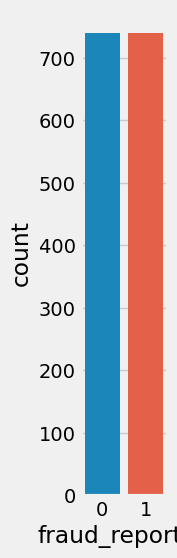

In [111]:
sns.countplot(x=y_traint)
plt.show()

# Machine Learning Algorithms Training and Testing Process

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [113]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_traint,y_traint,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc= accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    print('\n')
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.6587837837837838 random_state 1


max_accuracy 0.6587837837837838 max_random_state 1
accuracy 0.6317567567567568 random_state 2


accuracy 0.6047297297297297 random_state 3


accuracy 0.6114864864864865 random_state 4


accuracy 0.5878378378378378 random_state 5


accuracy 0.5709459459459459 random_state 6


accuracy 0.5743243243243243 random_state 7


accuracy 0.5945945945945946 random_state 8


accuracy 0.625 random_state 9


accuracy 0.6047297297297297 random_state 10


accuracy 0.5878378378378378 random_state 11


accuracy 0.5675675675675675 random_state 12


accuracy 0.5540540540540541 random_state 13


accuracy 0.6351351351351351 random_state 14


accuracy 0.5371621621621622 random_state 15


accuracy 0.5912162162162162 random_state 16


accuracy 0.597972972972973 random_state 17


accuracy 0.5743243243243243 random_state 18


accuracy 0.6047297297297297 random_state 19


accuracy 0.6013513513513513 random_state 20


accuracy 0.6047297297297297 random_state 21


accura

In [114]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.6587837837837838 on Random_state 1


In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=138)

In [116]:
# Logistic Regression;

lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 77.04081632653062
[[151   0]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       151
           1       0.00      0.00      0.00        45

    accuracy                           0.77       196
   macro avg       0.39      0.50      0.44       196
weighted avg       0.59      0.77      0.67       196



In [117]:
# K-NearestNeighbors;

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_knn)*100)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

Accuracy 77.04081632653062
[[149   2]
 [ 43   2]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       151
           1       0.50      0.04      0.08        45

    accuracy                           0.77       196
   macro avg       0.64      0.52      0.48       196
weighted avg       0.71      0.77      0.69       196



In [118]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 82.14285714285714
[[131  20]
 [ 15  30]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       151
           1       0.60      0.67      0.63        45

    accuracy                           0.82       196
   macro avg       0.75      0.77      0.76       196
weighted avg       0.83      0.82      0.82       196



In [119]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 79.59183673469387
[[140  11]
 [ 29  16]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       151
           1       0.59      0.36      0.44        45

    accuracy                           0.80       196
   macro avg       0.71      0.64      0.66       196
weighted avg       0.77      0.80      0.78       196



In [120]:
# Ada Boost Classifier;

from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_ad)*100)
print(confusion_matrix(y_test,pred_ad))
print(classification_report(y_test,pred_ad))

Accuracy 78.57142857142857
[[133  18]
 [ 24  21]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       151
           1       0.54      0.47      0.50        45

    accuracy                           0.79       196
   macro avg       0.69      0.67      0.68       196
weighted avg       0.78      0.79      0.78       196



In [121]:
# Gradient Boost Classifier;

from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gb)*100)
print(confusion_matrix(y_test,pred_gb))
print(classification_report(y_test,pred_gb))

Accuracy 83.6734693877551
[[135  16]
 [ 16  29]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       151
           1       0.64      0.64      0.64        45

    accuracy                           0.84       196
   macro avg       0.77      0.77      0.77       196
weighted avg       0.84      0.84      0.84       196



In [122]:
# Cross Validation for logistic regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x_traint,y_traint,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predlr)*100)

Cross validation score of Logistic Regression model: [0.65454545 0.53333333 0.57575758 0.57575758 0.6097561  0.5304878
 0.64634146 0.63414634 0.58536585]
Mean of Cross validation score: 0.593943500041061
Accuracy 77.04081632653062


In [123]:
# Cross Validation for Knn Classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(knn,x_traint,y_traint,cv=9)
print('Cross validation score of Knn model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_knn)*100)

Cross validation score of Knn model: [0.59393939 0.6        0.64242424 0.6969697  0.70731707 0.65243902
 0.68902439 0.72560976 0.74390244]
Mean of Cross validation score: 0.6724028906955737
Accuracy 77.04081632653062


In [124]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x_traint,y_traint,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.77575758 0.76363636 0.66060606 0.86060606 0.84756098 0.82926829
 0.82317073 0.87804878 0.84146341]
Mean of Cross validation score: 0.8089020284142235
Accuracy 82.14285714285714


In [125]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x_traint,y_traint,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)

Cross validation score of Random Forest Classifier model: [0.71515152 0.77575758 0.78787879 0.90909091 0.93292683 0.89634146
 0.93292683 0.94512195 0.90243902]
Mean of Cross validation score: 0.8664038761599736
Accuracy 79.59183673469387


In [126]:
# Cross Validation for AdaBoost classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(ad,x_traint,y_traint,cv=9)
print('Cross validation score of AdaBoost Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Classifier model: [0.75151515 0.67878788 0.67878788 0.88484848 0.8902439  0.90243902
 0.92682927 0.92682927 0.93292683]
Mean of Cross validation score: 0.8414675207358134
Accuracy 78.57142857142857


In [127]:
# Cross Validation for GradientBoosting classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(gb,x_traint,y_traint,cv=9)
print('Cross validation score of GradientBoosting Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_gb)*100)

Cross validation score of GradientBoosting Classifier model: [0.75757576 0.79393939 0.76363636 0.87878788 0.92073171 0.86585366
 0.90853659 0.93902439 0.90243902]
Mean of Cross validation score: 0.8589471955325614
Accuracy 83.6734693877551


# Hyperparameter Tuning

In [128]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [129]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7],
            'subsample':[0.6,0.7,0.8,1.0],
            'n_estimators':[100,200,300,400]}

In [130]:
GCV=GridSearchCV(estimator=GradientBoostingClassifier(),
                 param_grid=parameters,cv=2,
                scoring=accuracy_score)

In [131]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100, 'subsample': 0.6}

In [132]:
gb=GradientBoostingClassifier(subsample=0.6,max_depth=4,max_features='auto',n_estimators=100)
gb.fit(x_train,y_train)
train_accuracy=gb.score(x_train,y_train)
pred_decision=gb.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
gbs=cross_val_score(gb,x_traint,y_traint,cv=5)
gbc=gb.score(x_train,y_train)
print('Cross_Val_Score',gbc*100)

0.9961734693877551
Accuracy_Score 0.8163265306122449
Cross_Val_Score 99.61734693877551


In [133]:
GCV.best_estimator_

GradientBoostingClassifier(max_depth=4, max_features='auto', subsample=0.6)

# Saving the Model

In [134]:
import pickle
filename='Insurance_Claim_Detection.pkl'
pickle.dump(gb,open(filename,'wb'))

# Conclusion

In [135]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gb.predict(x_test))
Insurance_Claim=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Insurance_Claim

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
191,0,0
192,0,0
193,0,0
194,0,0
